# **WORKSHOP 4 - Gray Scale Morphology - Real-Time Bone Fracture Detection** #
### **NAME:** **NITHYA D** ###
### **REGISTER NUMBER:** **212223240110** ###

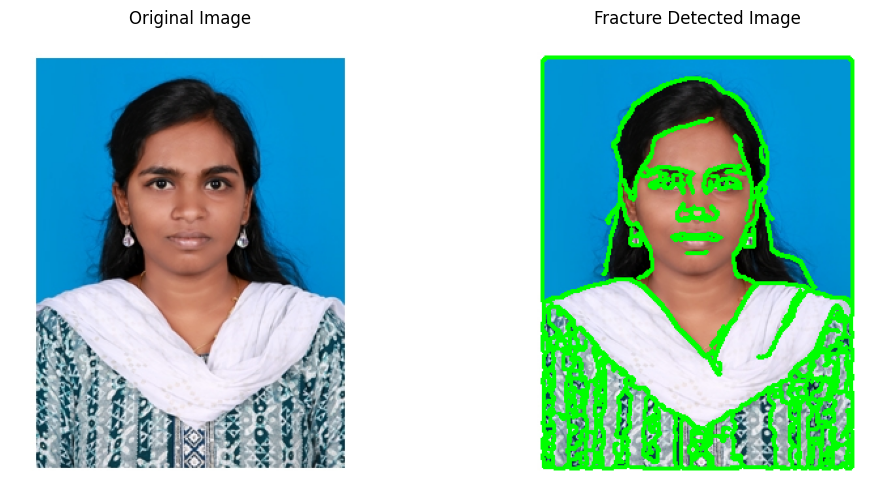

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_fractures(preprocessed, original):
    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(preprocessed, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    edges = cv2.Canny(dilation, 50, 150)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = original.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    return result

def present_results(original_image, processed_image):
    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Fracture Detected Image")
    plt.imshow(processed_rgb)
    plt.axis('off')

    plt.show()

# --- Main Execution ---
image_path = 'Nithya.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found. Check the file path.")
else:
    preprocessed = preprocess_image(image)
    fracture_detected_image = detect_fractures(preprocessed, image)
    present_results(image, fracture_detected_image)